In [0]:
import sys
basePath='/Workspace/Users/bill.curry@exxonmobil.com'
gistPath=basePath+'/GIST'
sys.path.append(gistPath+'/lib')
import numpy as np
import pandas as pd
import os
import gistMC as gi

#Fault Slip Potential reference
Density               = 1000    kg/m^3

Dynamic Viscosity     = 0.0008   Pa.s

Fluid Compressibility = 3.6e-10  Pa^-1

Rock Compressibility  = 1.08e-09 Pa^-1

Aquifer Thickness     = 100      ft

Porosity              = 10       %

Permeability          = 200      mD

Injection:

  25000 bpd from 1/1/2017 - 1/1/2019

  0 kbd from 1/1/2019 - 1/1/2021

  Well at x=10, y=10

Grids = x 2 to 18 km, 50 samples


In [0]:
porosityPercentMin=9.99999
porosityPercentMax=10.00001
permMDMin=199.99999
permMDMax=200.00001
thicknessFTMin=99.9999
thicknessFTMax=100.0001
WaterDensityMin=999.9999
WaterDensityMax=1000.0001
WaterViscosityMin=0.0007999999
WaterViscosityMax=0.0008000001
VerticalCompressibilityMin=0.000000001079999
VerticalCompressibilityMax=0.000000001080001
FluidCompressibilityMin=0.0000000003599999
FluidCompressibilityMax=0.0000000003600001
nRealizations=5


In [0]:
# Load FSP results from Reference directory
years=[2018,2019,2020,2021]
refPrefix=gistPath+'/regression/Reference/ConstantInjectionReference'
refPaths=[]
for year in years:
  refPaths.append(refPrefix+str(year)+'.csv')
print(refPaths)
# Set axis information
ox=2.
oy=2.
dx=0.3265306

['/Workspace/Users/bill.curry@exxonmobil.com/GIST/regression/Reference/ConstantInjectionReference2018.csv', '/Workspace/Users/bill.curry@exxonmobil.com/GIST/regression/Reference/ConstantInjectionReference2019.csv', '/Workspace/Users/bill.curry@exxonmobil.com/GIST/regression/Reference/ConstantInjectionReference2020.csv', '/Workspace/Users/bill.curry@exxonmobil.com/GIST/regression/Reference/ConstantInjectionReference2021.csv']


In [0]:
ref2018DF=pd.read_csv(refPaths[0],header=1,usecols=[0,1,2])
ref2018DF['Year']=2018
ref2019DF=pd.read_csv(refPaths[1],header=1,usecols=[0,1,2])
ref2019DF['Year']=2019
ref2020DF=pd.read_csv(refPaths[2],header=1,usecols=[0,1,2])
ref2020DF['Year']=2020
ref2021DF=pd.read_csv(refPaths[3],header=1,usecols=[0,1,2])
ref2021DF['Year']=2021
refMatlabDF=pd.concat([ref2018DF,ref2019DF,ref2020DF,ref2021DF],ignore_index=True)
print(refMatlabDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   X_Easting_km             10000 non-null  float64
 1    Y_Northing_km           10000 non-null  float64
 2    additionalPressure_PSI  10000 non-null  float64
 3   Year                     10000 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 312.6 KB
None


In [0]:
refMatlabNP=np.zeros([50,50,4])
for index,row in refMatlabDF.iterrows():
  ix=round(((row['X_Easting_km'])-ox)/dx)
  iy=round((row[' Y_Northing_km']-oy)/dx)
  it=round(row['Year']-2018)
  refMatlabNP[ix,iy,it]=row[' additionalPressure_PSI']


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
#f, axarr = plt.subplots(4, sharex=True,figsize=(10,40))
#for i in range(4):
#  sns.heatmap(refMatlabNP[:,:,i],ax=axarr[i])

#Generate Inputs used for FSP

In [0]:
# Create injection data

wells={'ID': 1,
       'APINumber' : '43-000-0000',
       'InjectionWellId': 1,
       'SurfaceHoleLatitude': 0.,
       'SurfaceHoleLongitude': 0.,
       'DXs': 10.,
       'DYs': 10.,
       'Distances': 0.,
       'WellName': 'Test',
       'Operator': 'TestCo'}

injVec=np.concatenate((np.zeros((1,1)),np.full((731,1),25000.),np.zeros((731,1))))
IDVec=np.ones((1463,1))
dateVec=pd.date_range(start='12/31/2016', end='1/1/2021')
print(len(injVec),len(IDVec),len(dateVec))
print(dateVec)
# Get vector of output matlab days
outRefDateVec=pd.to_datetime(['1/1/2018','1/1/2019','1/1/2020','1/1/2021'])
outRefDayVec=(outRefDateVec-pd.to_datetime('1/1/1970')).days
dayVec=(dateVec-pd.to_datetime('1/1/1970')).days.to_numpy()
print(outRefDateVec)
print(outRefDayVec)
print(dayVec)

1463 1463 1463
DatetimeIndex(['2016-12-31', '2017-01-01', '2017-01-02', '2017-01-03',
               '2017-01-04', '2017-01-05', '2017-01-06', '2017-01-07',
               '2017-01-08', '2017-01-09',
               ...
               '2020-12-23', '2020-12-24', '2020-12-25', '2020-12-26',
               '2020-12-27', '2020-12-28', '2020-12-29', '2020-12-30',
               '2020-12-31', '2021-01-01'],
              dtype='datetime64[ns]', length=1463, freq='D')
DatetimeIndex(['2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01'], dtype='datetime64[ns]', freq=None)
Int64Index([17532, 17897, 18262, 18628], dtype='int64')
[17166 17167 17168 ... 18626 18627 18628]


In [0]:
# Convert to dataframes
# Well dataframe - one well
wellDF=pd.DataFrame(wells,index=[0])
# Injection dataframe - from numpy arrays
injDF=pd.DataFrame({'ID': IDVec.flatten(),
                    'Days': dayVec.flatten(),
                    'Date': dateVec.to_numpy().flatten(),
                    'BPD': injVec.flatten()})

In [0]:
# Make output time and location information
x=np.linspace(2.,18.,50)
y=np.linspace(2.,18.,50)
xx,yy=np.meshgrid(x,y)
xy=np.zeros([xx.shape[0],yy.shape[1],2])
xy[:,:,0]=xx
xy[:,:,1]=yy
# Assume the well is at the equator:
lon=np.linspace(((2.-10.)/111.111),((18.-10.)/111.111),50)
lat=np.linspace(((2.-10.)/111.111),((18.-10.)/111.111),50)
latlon=np.meshgrid(lon,lat)
print(xy)
print(latlon)

[[[ 2.          2.        ]
  [ 2.32653061  2.        ]
  [ 2.65306122  2.        ]
  ...
  [17.34693878  2.        ]
  [17.67346939  2.        ]
  [18.          2.        ]]

 [[ 2.          2.32653061]
  [ 2.32653061  2.32653061]
  [ 2.65306122  2.32653061]
  ...
  [17.34693878  2.32653061]
  [17.67346939  2.32653061]
  [18.          2.32653061]]

 [[ 2.          2.65306122]
  [ 2.32653061  2.65306122]
  [ 2.65306122  2.65306122]
  ...
  [17.34693878  2.65306122]
  [17.67346939  2.65306122]
  [18.          2.65306122]]

 ...

 [[ 2.         17.34693878]
  [ 2.32653061 17.34693878]
  [ 2.65306122 17.34693878]
  ...
  [17.34693878 17.34693878]
  [17.67346939 17.34693878]
  [18.         17.34693878]]

 [[ 2.         17.67346939]
  [ 2.32653061 17.67346939]
  [ 2.65306122 17.67346939]
  ...
  [17.34693878 17.67346939]
  [17.67346939 17.67346939]
  [18.         17.67346939]]

 [[ 2.         18.        ]
  [ 2.32653061 18.        ]
  [ 2.65306122 18.        ]
  ...
  [17.34693878 18.      

# Run isotropic modeling

In [0]:
# Initialize GIST in one interval
gistTest=gi.gistMC(nReal=nRealizations,
                   ntBin=20)
gistTest.initPP(rho0_min=WaterDensityMin,
                rho0_max=WaterDensityMax,
                nta_min=WaterViscosityMin,
                nta_max=WaterViscosityMax,
                phi_min=porosityPercentMin,
                phi_max=porosityPercentMax,
                kMD_min=permMDMin,
                kMD_max=permMDMax,
                h_min=thicknessFTMin,
                h_max=thicknessFTMax,
                alphav_min=VerticalCompressibilityMin,
                alphav_max=VerticalCompressibilityMax,
                beta_min=FluidCompressibilityMin,
                beta_max=FluidCompressibilityMax)
# convert well and injection information into numpy arrays

# call runPressureGrid
pressureGrid=gistTest.runPressureGrid(wellDF,injDF,grid=xy,dt=1)

dx, dy  10000.0 10000.0


In [0]:
print(pressureGrid.shape)

(50, 50, 1, 5, 1465)


# Compare isotropic results

<Axes: xlabel='Date', ylabel='BPD'>

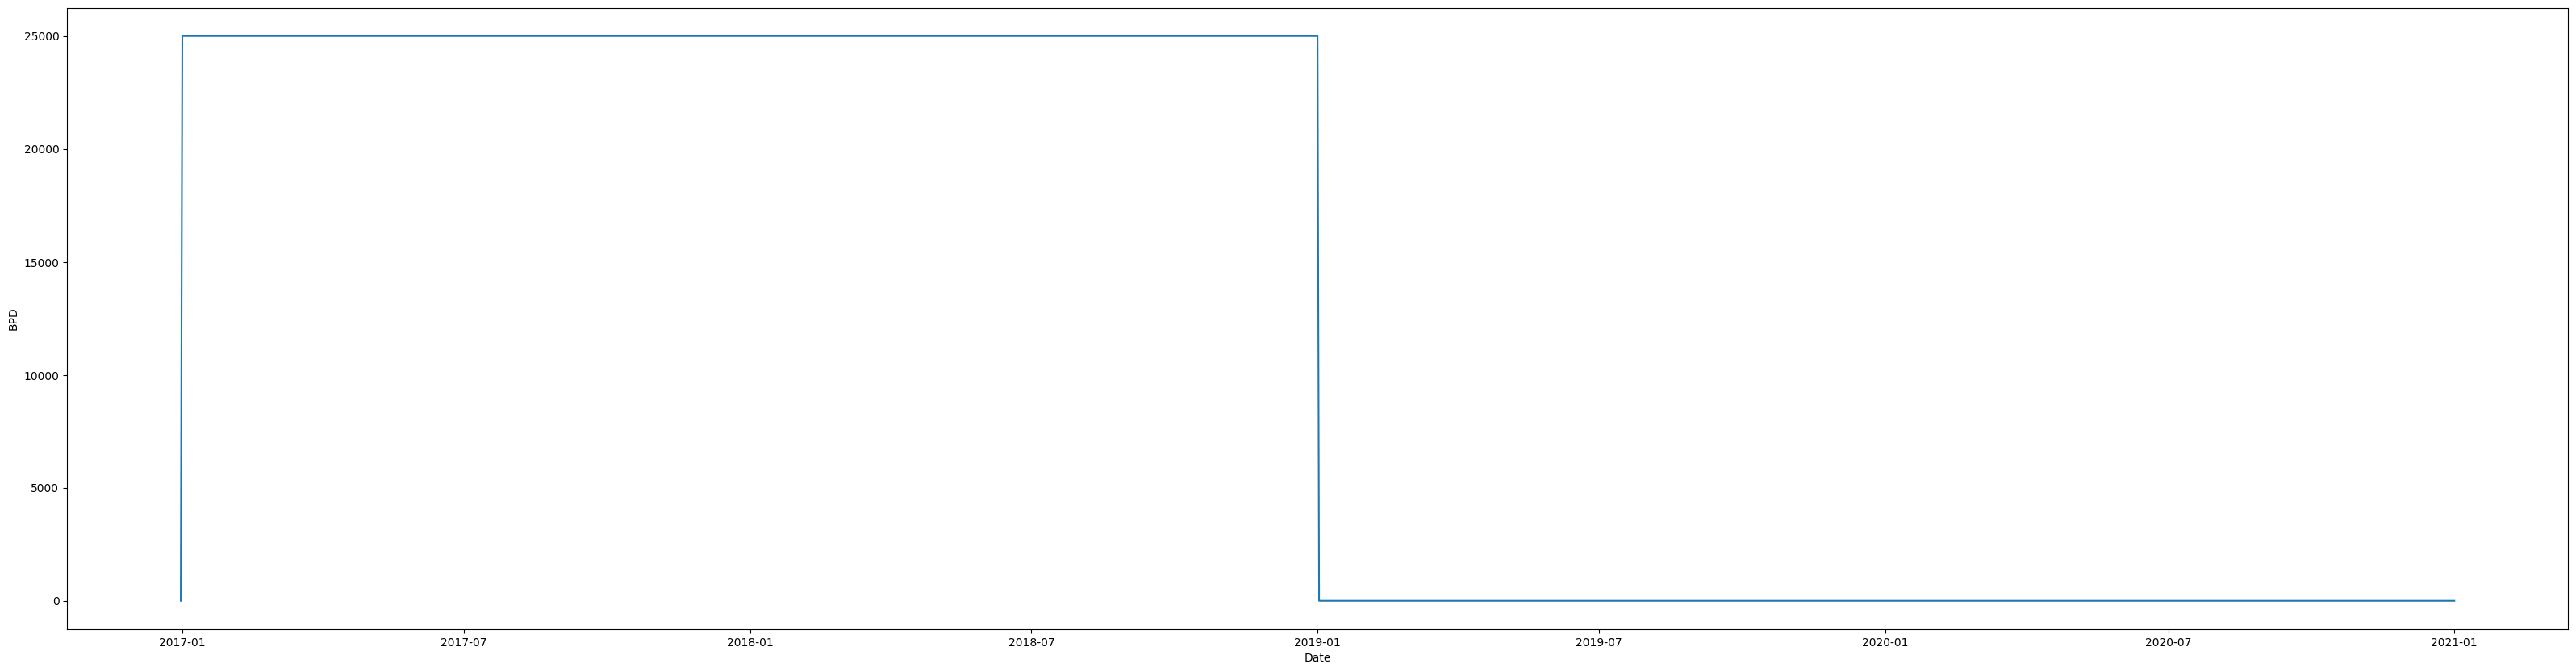

In [0]:
# Plot injection time series
f, ax = plt.subplots(1, 1,figsize=(40,10))
sns.lineplot(data=injDF,x='Date',y='BPD')

Int64Index([366, 731, 1096, 1462], dtype='int64')
366
731
1096
1462


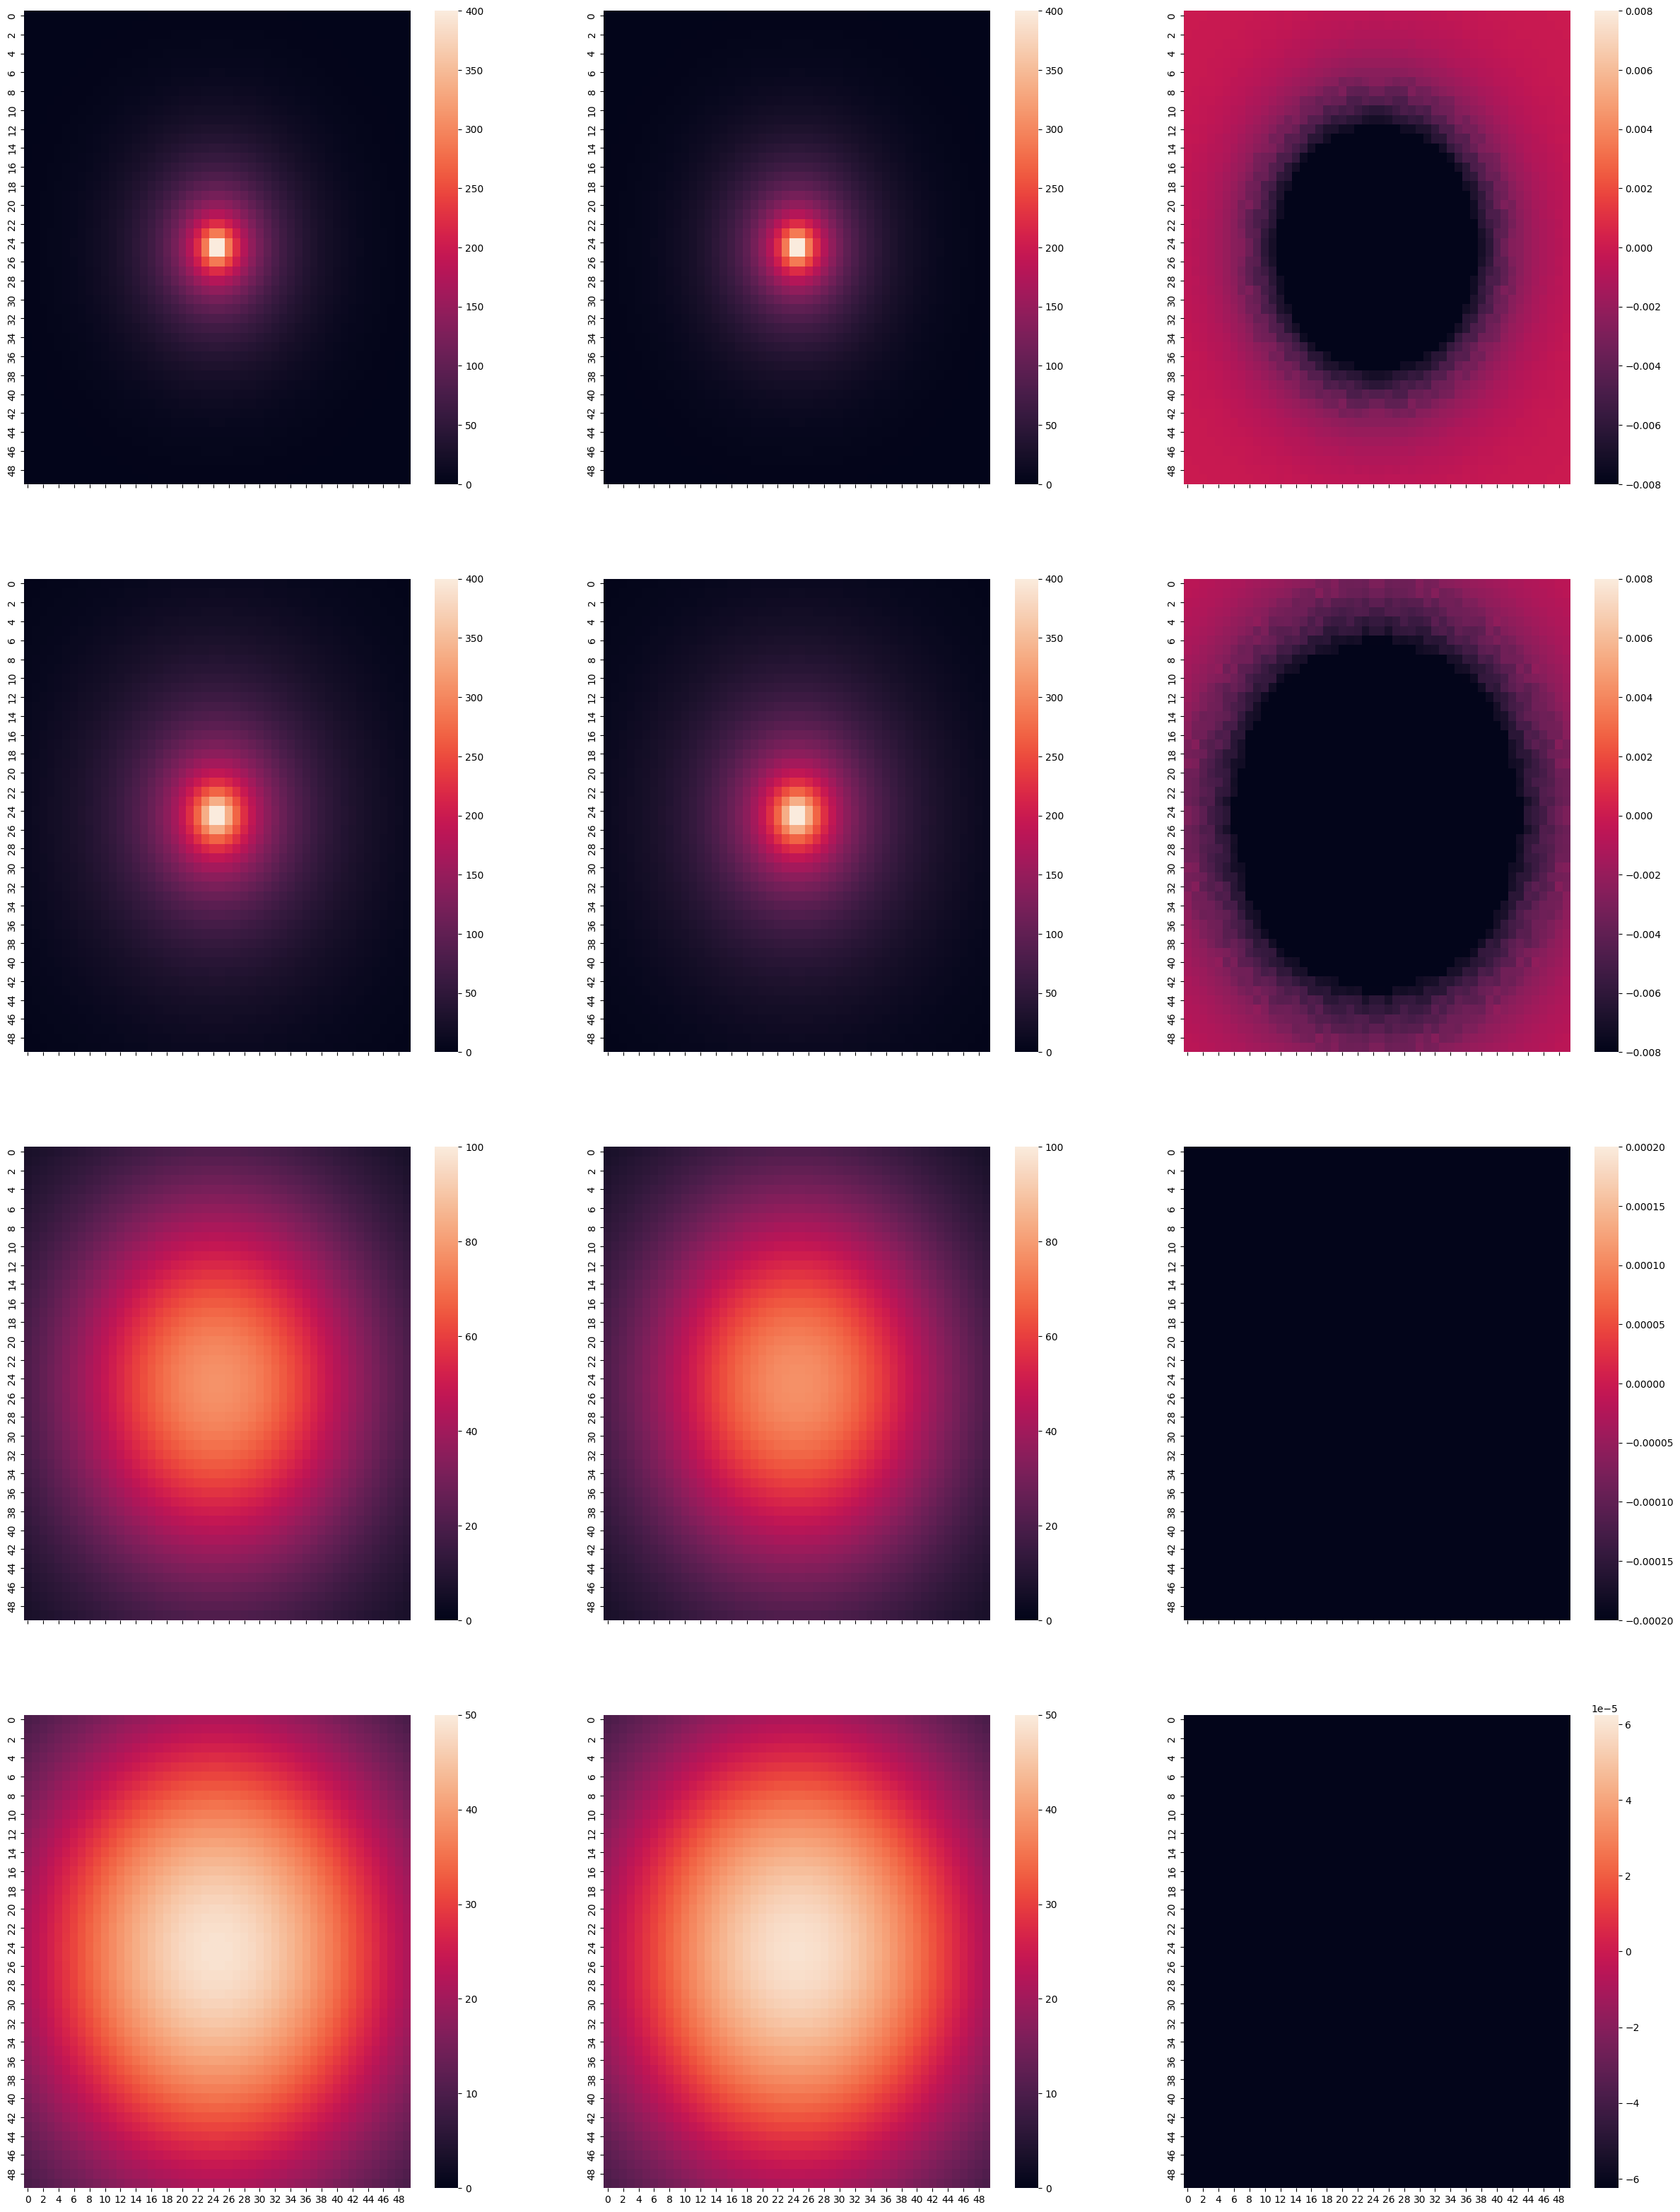

In [0]:
# Compare Matlab to computed
f, axarr = plt.subplots(4, 3,sharex=True,figsize=(30,40))
# Get plots out at a four intervals, Jan 1 per year
outIdx=outRefDayVec-min(dayVec)
print(outIdx)
diffNP=np.zeros([pressureGrid.shape[0],pressureGrid.shape[1],len(outIdx)])
# set color ranges
vmap=[400,400,100,50]
vdiffmap=[0.008,0.008,0.0002,0.0000625]
for i in range(len(outIdx)):
  print(outIdx[i])
  sns.heatmap(pressureGrid[:,:,0,0,outIdx[i]],ax=axarr[i,0],vmin=0.,vmax=vmap[i])
  sns.heatmap(refMatlabNP[:,:,i],ax=axarr[i,1],vmin=0.,vmax=vmap[i])
  diffNP[:,:,i]=refMatlabNP[:,:,i]-pressureGrid[:,:,0,0,outIdx[i]]
  sns.heatmap(diffNP[:,:,i],ax=axarr[i,2],vmin=-vdiffmap[i],vmax=vdiffmap[i])

#Create differences


In [0]:
print(wellDF)
eq1={'SeismicEventId': 1,
    'EventID': 'test000',
    'Origin Date': pd.to_datetime('1/1/2021').date(),
    'Latitude': 0.07200007,
    'Longitude': 0.07200007,
    'DepthKm': 3.,
    'DepthErrorKm': 0.1,
    'Magnitude': 1.,
    'MagnitudeError': 1.,
    'LatitudeErrorKm': 1.,
    'LongitudeErrorKm': 1.}
eq2={'SeismicEventId': 2,
    'EventID': 'test002',
    'Origin Date': pd.to_datetime('1/1/2021').date(),
    'Latitude': 0.0020000,
    'Longitude': 0.0020000,
    'DepthKm': 3.,
    'DepthErrorKm': 0.1,
    'Magnitude': 1.,
    'MagnitudeError': 1.,
    'LatitudeErrorKm': 1.,
    'LongitudeErrorKm': 1.}
print(eq1,eq2)

   ID    APINumber  InjectionWellId  ...  Distances  WellName  Operator
0   1  43-000-0000                1  ...        0.0      Test    TestCo

[1 rows x 10 columns]
{'SeismicEventId': 1, 'EventID': 'test000', 'Origin Date': datetime.date(2021, 1, 1), 'Latitude': 0.07200007, 'Longitude': 0.07200007, 'DepthKm': 3.0, 'DepthErrorKm': 0.1, 'Magnitude': 1.0, 'MagnitudeError': 1.0, 'LatitudeErrorKm': 1.0, 'LongitudeErrorKm': 1.0} {'SeismicEventId': 2, 'EventID': 'test002', 'Origin Date': datetime.date(2021, 1, 1), 'Latitude': 0.002, 'Longitude': 0.002, 'DepthKm': 3.0, 'DepthErrorKm': 0.1, 'Magnitude': 1.0, 'MagnitudeError': 1.0, 'LatitudeErrorKm': 1.0, 'LongitudeErrorKm': 1.0}


In [0]:
# Next generate a pressure time series at one point on the grid above and run using runPressureScenarios. Compare time series to result from runPressureGrid which we should be happy with
# Update wellDF with distance to earthquake - 
gistTest.injDT=1.
wellDF['Distances']=np.sqrt(128.)
scenario1DF,dP1,wellIDs1,dayVec1 = gistTest.runPressureScenariosTimeSeries(eq1,wellDF,injDF,verbose=2)
scenario1DFA,dP1A,wellIDs1A,dayVec1A = gistTest.runPressureScenariosTimeSeriesTest(eq1,wellDF,injDF,verbose=2)
wellDF['Distances']=np.sqrt(2.12244898*2.12244898*2.)
scenario2DF,dP2,wellIDs2,dayVec2 = gistTest.runPressureScenariosTimeSeries(eq2,wellDF,injDF,verbose=2)
scenario2DFA,dP2A,wellIDs2A,dayVec2A = gistTest.runPressureScenariosTimeSeriesTest(eq2,wellDF,injDF,verbose=2)

runPressureScenariosTimeSeries time axis information - nt: 1465 ; ot: 17165.0 ; dt: 1.0  earthquake index:  1463
runPressureScenariosTimeSeries r2 min/max:  128000000.00000001 128000000.00000001
runPressureScenariosTimeSeries TSOver4TT min/max:  1.127271896454674 1.1272734470430525
runPressureScenariosTimeSeries ppp min/max:  144290802.7461983 144291001.22151074
runPressureScenariosTimeSeries durations min/max:  86400.0 126576000.0
runPressureScenariosTimeSeries epp min/max:  0.0 0.17434758954172377
runPRessureScenariosTimeSeries time step  10  of  1465
runPRessureScenariosTimeSeries time step  20  of  1465
runPRessureScenariosTimeSeries time step  30  of  1465
runPRessureScenariosTimeSeries time step  40  of  1465
runPRessureScenariosTimeSeries time step  50  of  1465
runPRessureScenariosTimeSeries time step  60  of  1465
runPRessureScenariosTimeSeries time step  70  of  1465
runPRessureScenariosTimeSeries time step  80  of  1465
runPRessureScenariosTimeSeries time step  90  of  1465


In [0]:
print(dP1.shape)
print(dP1A.shape)
dP1v=dP1.transpose((2,1,0))
dP2v=dP2.transpose((2,1,0))
dPv=np.concatenate((dP1v,dP2v),axis=2)
dP1Av=dP1A.transpose((2,1,0))
dP2Av=dP2A.transpose((2,1,0))
dPAv=np.concatenate((dP1Av,dP2Av),axis=2)
print(scenario2DFA)
print(scenario2DF)

(1, 5, 1465)
(1, 5, 1465)
   EventID  EventLatitude  ...  Percentages Realization
0  test002          0.002  ...        100.0           0
1  test002          0.002  ...        100.0           1
2  test002          0.002  ...        100.0           2
3  test002          0.002  ...        100.0           3
4  test002          0.002  ...        100.0           4

[5 rows x 13 columns]
   EventID  EventLatitude  ...  Percentages Realization
0  test002          0.002  ...        100.0           0
1  test002          0.002  ...        100.0           1
2  test002          0.002  ...        100.0           2
3  test002          0.002  ...        100.0           3
4  test002          0.002  ...        100.0           4

[5 rows x 13 columns]


In [0]:
# Get snapshots from FSP modeling
print(refMatlabNP.shape)
print(xy[0,:])
matlab1=refMatlabNP[49,49,:].flatten()
matlab2=refMatlabNP[18,18,:].flatten()
print(outRefDayVec)
print(outRefDateVec)
print(len(dateVec),len(dPv[:,0,0]))

(50, 50, 4)
[[ 2.          2.        ]
 [ 2.32653061  2.        ]
 [ 2.65306122  2.        ]
 [ 2.97959184  2.        ]
 [ 3.30612245  2.        ]
 [ 3.63265306  2.        ]
 [ 3.95918367  2.        ]
 [ 4.28571429  2.        ]
 [ 4.6122449   2.        ]
 [ 4.93877551  2.        ]
 [ 5.26530612  2.        ]
 [ 5.59183673  2.        ]
 [ 5.91836735  2.        ]
 [ 6.24489796  2.        ]
 [ 6.57142857  2.        ]
 [ 6.89795918  2.        ]
 [ 7.2244898   2.        ]
 [ 7.55102041  2.        ]
 [ 7.87755102  2.        ]
 [ 8.20408163  2.        ]
 [ 8.53061224  2.        ]
 [ 8.85714286  2.        ]
 [ 9.18367347  2.        ]
 [ 9.51020408  2.        ]
 [ 9.83673469  2.        ]
 [10.16326531  2.        ]
 [10.48979592  2.        ]
 [10.81632653  2.        ]
 [11.14285714  2.        ]
 [11.46938776  2.        ]
 [11.79591837  2.        ]
 [12.12244898  2.        ]
 [12.44897959  2.        ]
 [12.7755102   2.        ]
 [13.10204082  2.        ]
 [13.42857143  2.        ]
 [13.75510204  2

Text(0.5, 1.0, 'Point 2.122km N and 2.122km E of injector')

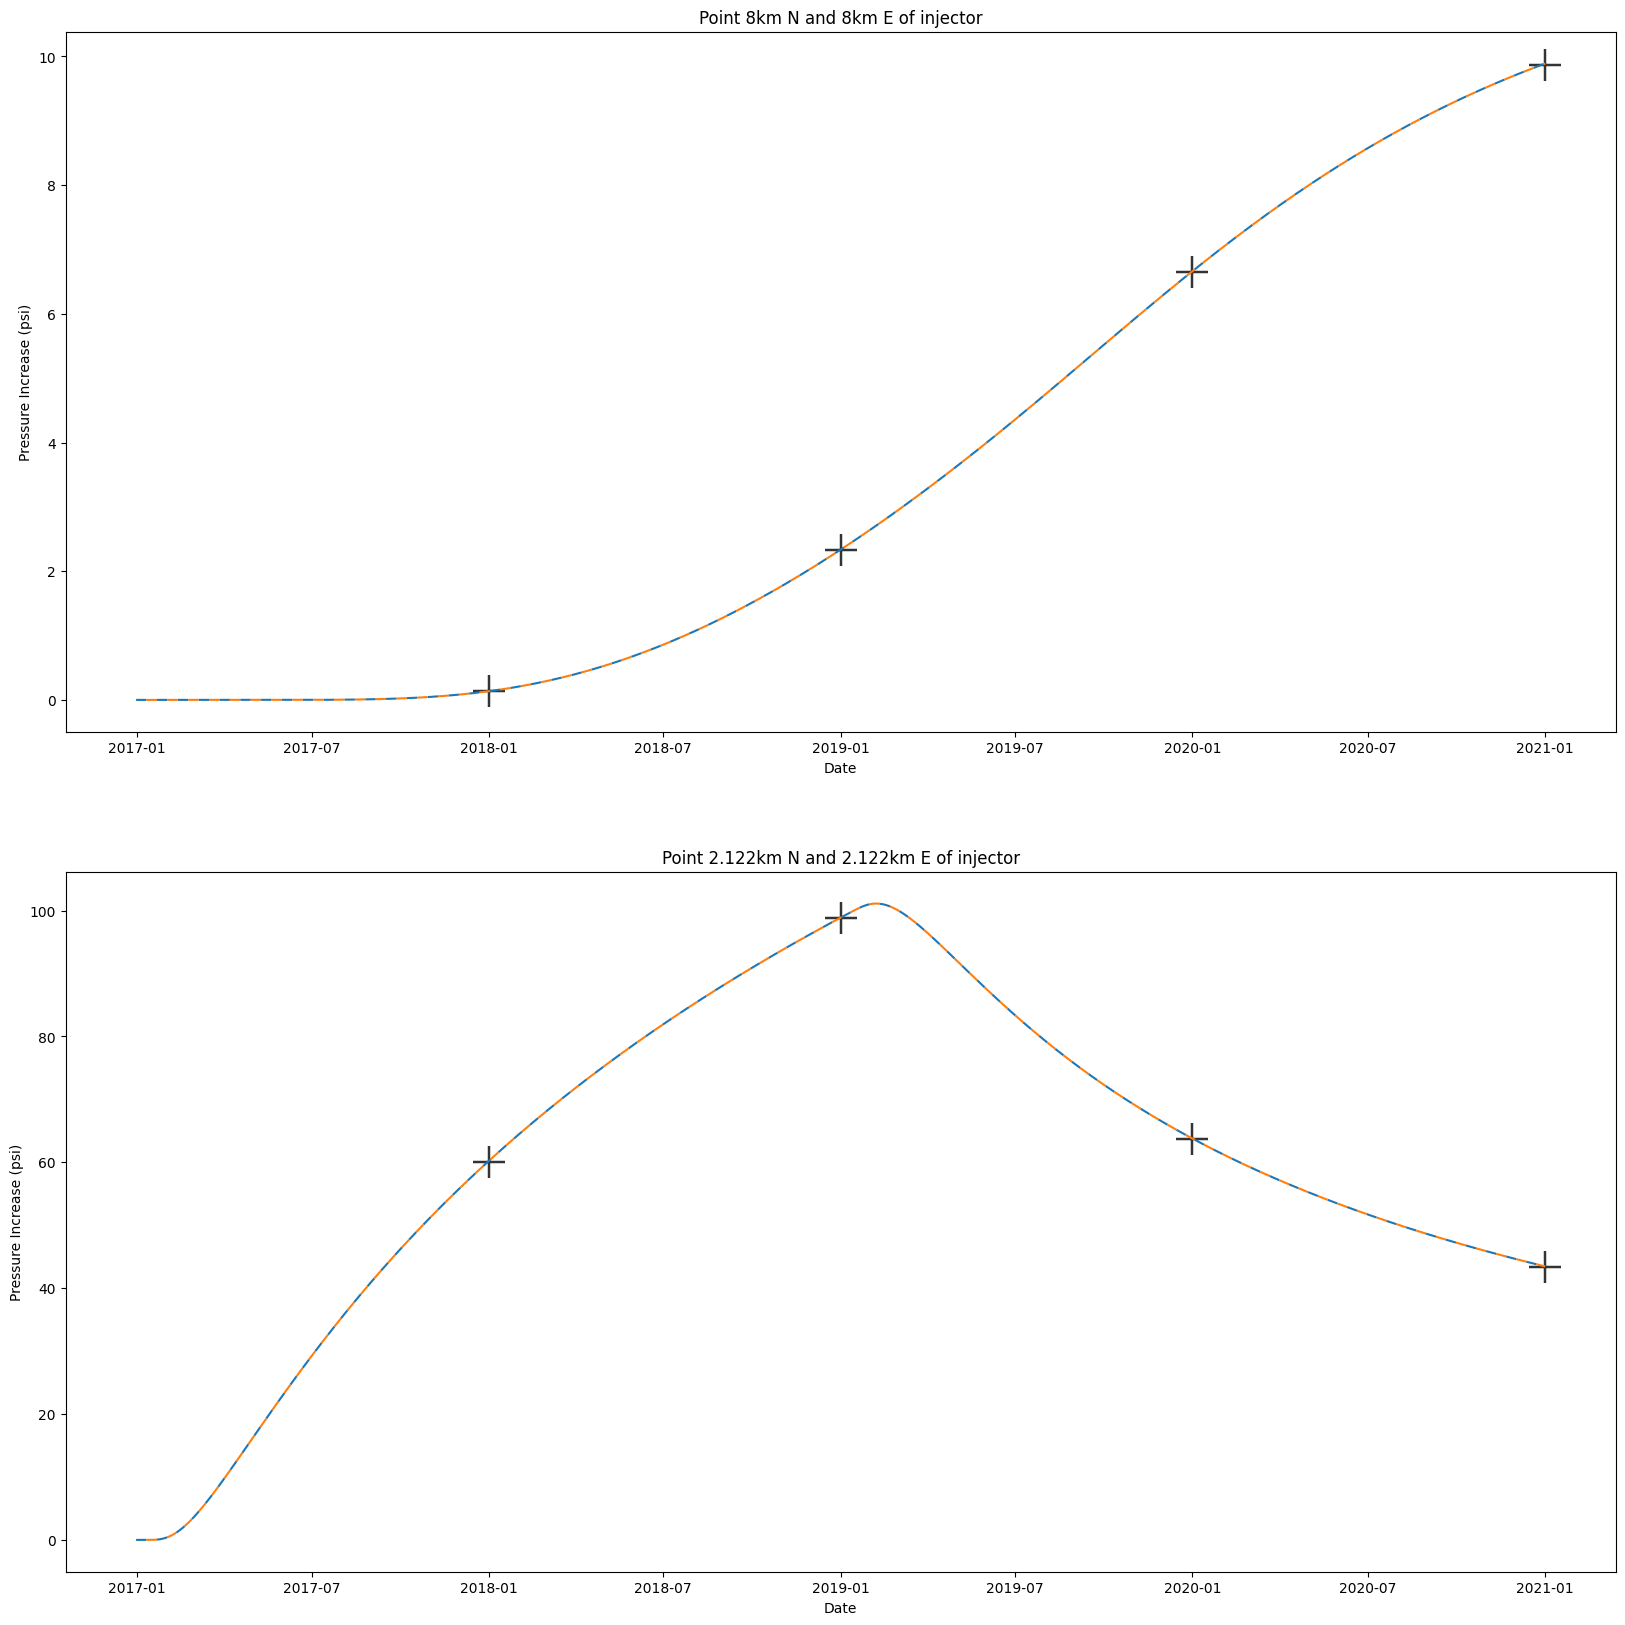

In [0]:
f, ax = plt.subplots(2, 1,figsize=(20,20))
sns.lineplot(x=dateVec,y=dPv[1:-1,0,0],ax=ax[0],linestyle=(0,(5,5)))
sns.lineplot(x=dateVec,y=dPAv[1:-1,0,0],ax=ax[0],linestyle=(5,(5,5)))
sns.scatterplot(x=outRefDateVec,y=matlab1,ax=ax[0], s=500, color=".2", marker="+")
sns.lineplot(x=dateVec,y=dPv[1:-1,0,1],ax=ax[1],linestyle=(0,(5,5)))
sns.lineplot(x=dateVec,y=dPAv[1:-1,0,1],ax=ax[1],linestyle=(5,(5,5)))
sns.scatterplot(x=outRefDateVec,y=matlab2,ax=ax[1], s=500, color=".2", marker="+")
ax[0].set_ylabel('Pressure Increase (psi)')
ax[0].set_xlabel('Date')
ax[0].set_title('Point 8km N and 8km E of injector')
ax[1].set_ylabel('Pressure Increase (psi)')
ax[1].set_xlabel('Date')
ax[1].set_title('Point 2.122km N and 2.122km E of injector')

# Load anisotropic reference

# Run anistropic modeling

# Compare anisotropic results